# 2. Project: Classification --- EDA

Load the all packages that you are going to use.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1**

Read the file train.csv into Python and print a few rows.

In [2]:
full_data = pd.read_csv("train.csv", index_col = 0)

In [3]:
full_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
full_data.shape

(891, 11)

In [5]:
full_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
full_data.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

**Step 2**

Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [7]:
full_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
full_data.groupby(["Survived"]).count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


Barplotting.

In [9]:
full_data["Pclass"]

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int64

<AxesSubplot:xlabel='Survived'>

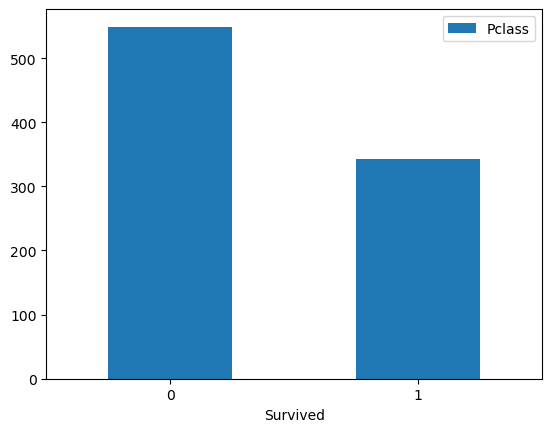

In [10]:
full_data[["Pclass", "Survived"]].groupby(["Survived"]).count().plot.bar(rot = 0)

In [11]:
survived = full_data[full_data["Survived"] == 1]

In [12]:
survived.count()

Survived    342
Pclass      342
Name        342
Sex         342
Age         290
SibSp       342
Parch       342
Ticket      342
Fare        342
Cabin       136
Embarked    340
dtype: int64

In [13]:
non_survived = full_data[full_data["Survived"] == 0]

In [14]:
non_survived.count()

Survived    549
Pclass      549
Name        549
Sex         549
Age         424
SibSp       549
Parch       549
Ticket      549
Fare        549
Cabin        68
Embarked    549
dtype: int64

<AxesSubplot:>

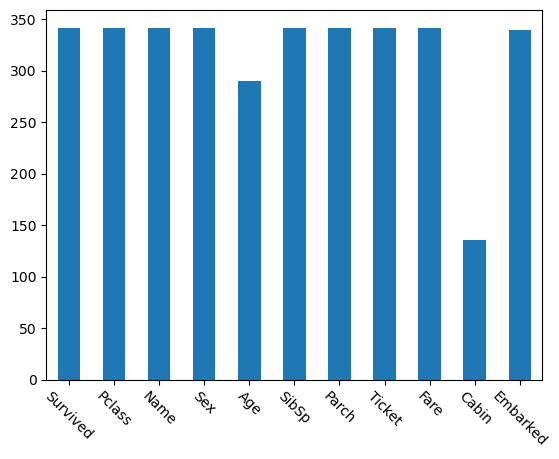

In [15]:
survived.count().plot.bar(rot = -45)

<AxesSubplot:>

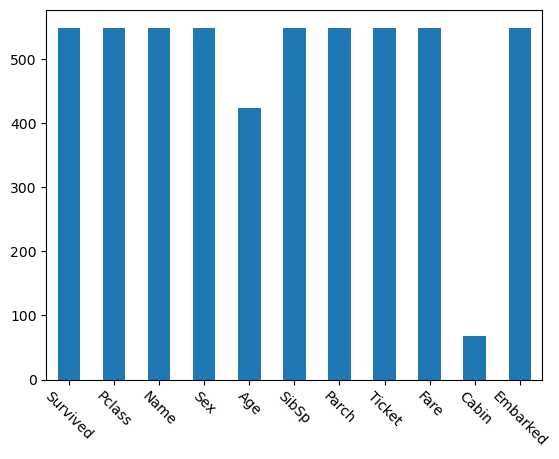

In [16]:
non_survived.count().plot.bar(rot = -45)

In [17]:
proportion =  survived.count()/non_survived.count()

In [18]:
proportion

Survived    0.622951
Pclass      0.622951
Name        0.622951
Sex         0.622951
Age         0.683962
SibSp       0.622951
Parch       0.622951
Ticket      0.622951
Fare        0.622951
Cabin       2.000000
Embarked    0.619308
dtype: float64

<AxesSubplot:>

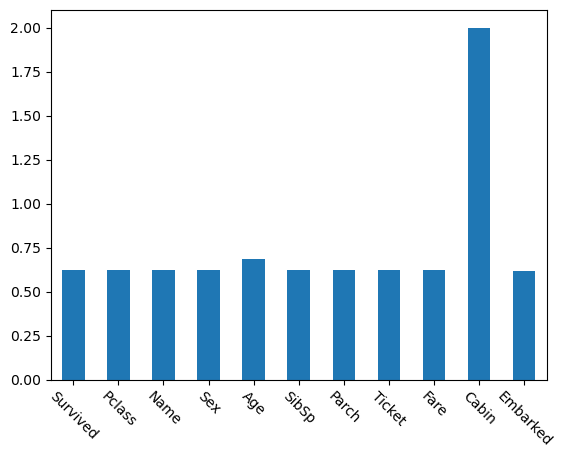

In [19]:
proportion.plot.bar(rot = -45)

**Step 3**

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [20]:
first_class = full_data[full_data["Pclass"] == 1]

In [21]:
total_first_class = first_class["Pclass"].count()

In [22]:
total_first_class

216

In [23]:
first_class_survived = first_class[first_class["Survived"] == 1]

In [24]:
first_class_survived.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


In [25]:
total_first_class_survived = first_class_survived["Pclass"].count()

In [26]:
total_first_class_survived

136

In [27]:
prop_first_class = total_first_class_survived/total_first_class

In [28]:
prop_first_class

0.6296296296296297

**Step 4**

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

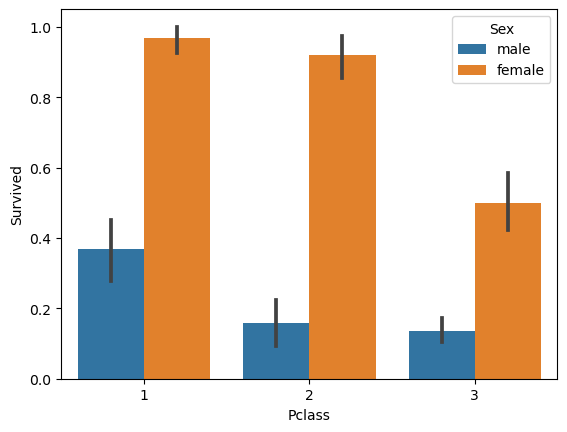

In [29]:
sns.barplot(data = full_data, x = "Pclass", y = "Survived", hue = "Sex")

**Step 5**

Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<AxesSubplot:ylabel='Frequency'>

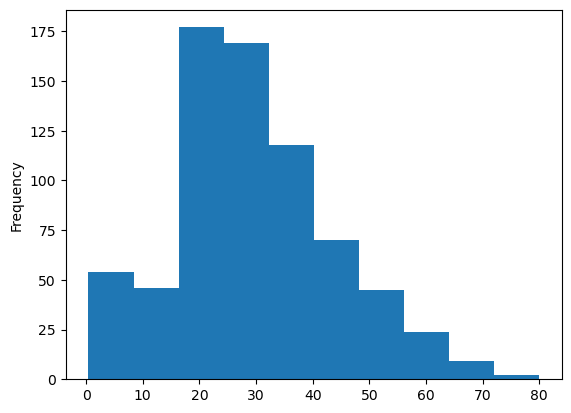

In [30]:
full_data["Age"].plot.hist()

Create histograms for survived and non_survived.

<AxesSubplot:ylabel='Frequency'>

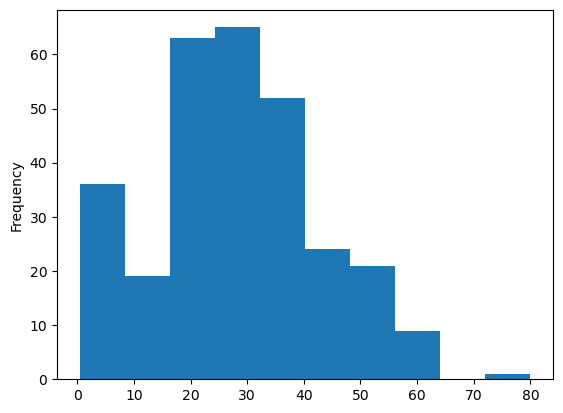

In [31]:
survived["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

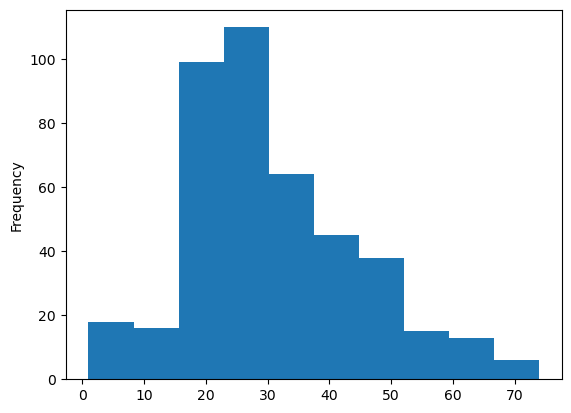

In [32]:
non_survived["Age"].plot.hist()

Create overlapping histograms.

/tmp/ipykernel_179251/2038317847.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([hist1, hist0], labels =["Survived", "Did not survive"])


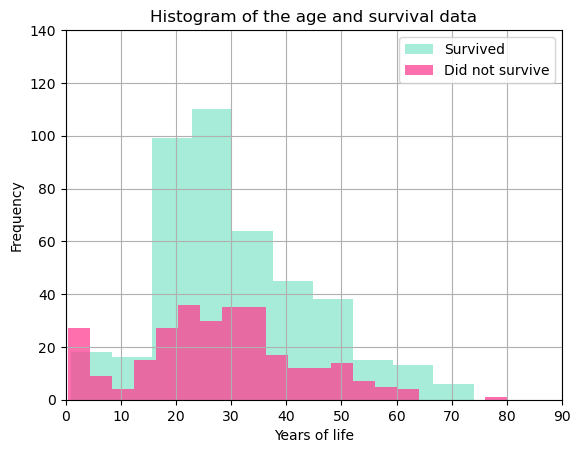

In [33]:
hist0 = full_data[full_data["Survived"] == 0]["Age"].hist(bins= 10, facecolor= '#8ae6cc',
alpha= 0.75,
histtype='bar')
hist1 = full_data[full_data["Survived"] == 1]["Age"].hist(bins = 20, facecolor= '#fd3f92',
alpha=0.75,
histtype='bar')
plt.title('Histogram of the age and survival data')
plt.xlabel('Years of life')
plt.ylabel('Frequency')
plt.axis([0.0, 90.0, 0.0, 140.0])
plt.legend([hist1, hist0], labels =["Survived", "Did not survive"])

**Step 6**

Calculate the average age for survived and drowned passengers separately.

In [34]:
survived["Age"].mean()

28.343689655172415

In [35]:
non_survived["Age"].mean()

30.62617924528302

**Step 7**

Replace missing age values by the mean age.

In [36]:
mean_age = full_data["Age"].mean()

In [37]:
mean_age

29.69911764705882

In [38]:
full_data_mean_age = full_data["Age"].fillna(mean_age)

In [39]:
full_data_mean_age


PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

**Step 8**

Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [40]:
full_data[["Fare", "Sex", "Pclass", "Survived"]].groupby(["Pclass", "Sex", "Survived"]).count()

Fare
Pclass Sex    Survived      
1      female 0            3
              1           91
       male   0           77
              1           45
2      female 0            6
              1           70
       male   0           91
              1           17
3      female 0           72
              1           72
       male   0          300
              1           47

<AxesSubplot:xlabel='Pclass,Sex,Survived'>

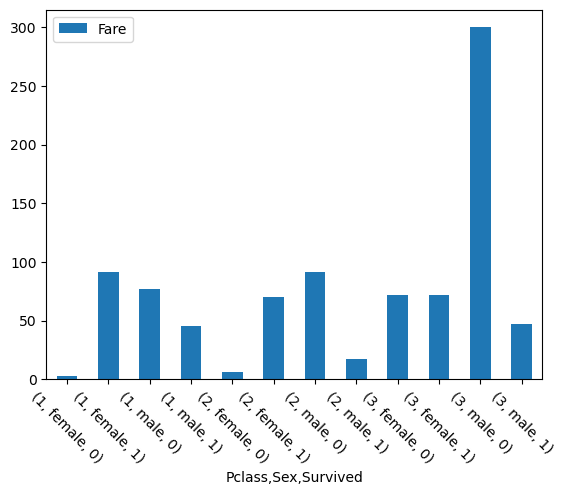

In [41]:
full_data[["Fare", "Sex", "Pclass", "Survived"]].groupby(["Pclass", "Sex", "Survived"]).count().plot.bar(rot = -45)

*****Bonus*****

<AxesSubplot:xlabel='Sex,Pclass'>

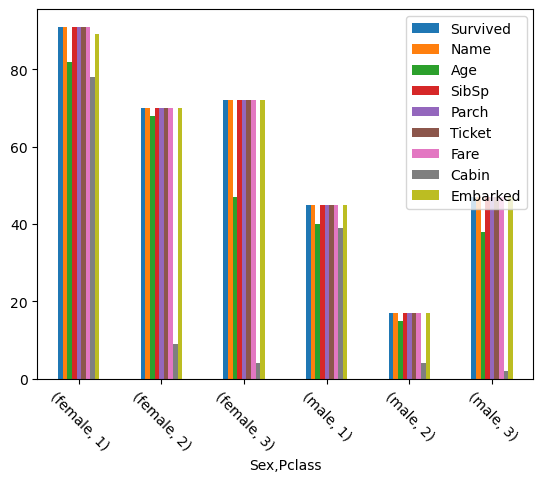

In [42]:
survived.groupby(["Sex", "Pclass"]).count().plot.bar(rot = -45)

<AxesSubplot:xlabel='Sex,Pclass'>

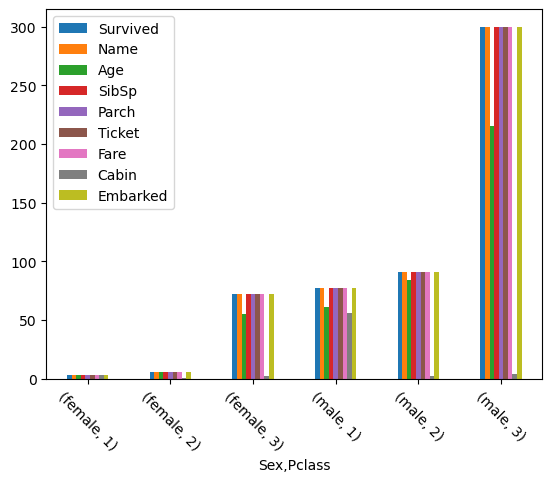

In [43]:
non_survived.groupby(["Sex", "Pclass"]).count().plot.bar(rot = -45)

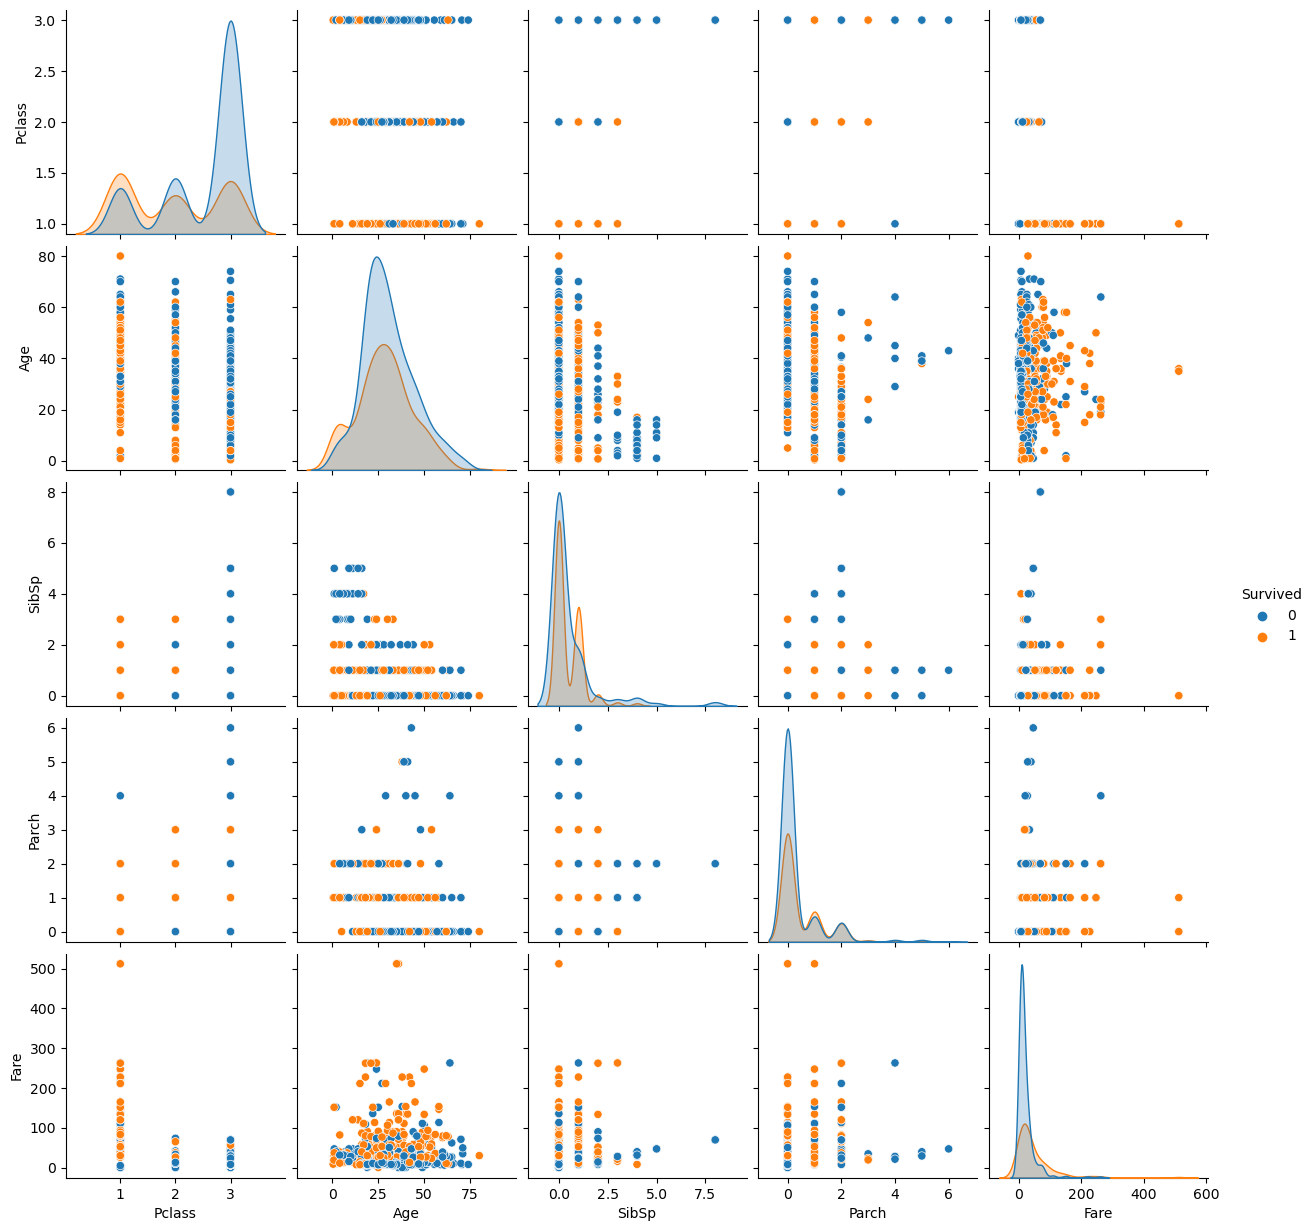

In [44]:
sns.pairplot(full_data, hue = "Survived")